In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")

In [46]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [47]:
new_data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]].copy()

In [48]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1


In [53]:
new_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [50]:
from sklearn.impute import SimpleImputer

In [51]:
si = SimpleImputer(strategy = "median")
new_data["Age"] = si.fit_transform(new_data[["Age"]])

In [52]:
new_data["Embarked"] = new_data["Embarked"].fillna(new_data["Embarked"].mode()[0])

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
new_data["Embarked"] = le.fit_transform(new_data["Embarked"])

In [56]:
age_en = {"male":0,"female":1}
new_data["Sex"] = new_data["Sex"].map(age_en)

In [57]:
#What is the percentage of passengers who survived?

new_data["Survived"].mean()*100

np.float64(38.38383838383838)

In [58]:
#What is the survival rate by gender?
new_data.groupby("Sex")["Survived"].mean()*100

Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64

In [61]:
#Create a new feature FamilySize = SibSp + Parch + 1

new_data["FamilySize"]= new_data["SibSp"] + new_data["Parch"] + 1
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,3,0,22.0,1,0,7.2500,2,0,2
1,1,1,38.0,1,0,71.2833,0,1,2
2,3,1,26.0,0,0,7.9250,2,1,1


In [63]:
#Bin the Fare column into 4 quantile-based bins using pd.qcut()

new_data["Fare_bin"] = pd.qcut(new_data["Fare"],q = 4)
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,Fare_bin
0,3,0,22.0,1,0,7.2500,2,0,2,"(-0.001, 7.91]"
1,1,1,38.0,1,0,71.2833,0,1,2,"(31.0, 512.329]"
2,3,1,26.0,0,0,7.9250,2,1,1,"(7.91, 14.454]"


In [68]:
new_data["Fare_bin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare_bin
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [66]:
le1 = LabelEncoder()
new_data["Fare_bin"] = le1.fit_transform(new_data["Fare_bin"])

In [67]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,Fare_bin
0,3,0,22.0,1,0,7.2500,2,0,2,0
1,1,1,38.0,1,0,71.2833,0,1,2,3
2,3,1,26.0,0,0,7.9250,2,1,1,1


In [ ]:
#Use train_test_split to split data into 80% training and 20% testing.

In [71]:
x = new_data.drop(["Survived"],axis = 1)
y = new_data["Survived"]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

# train random forest model

In [ ]:
#Train a RandomForestClassifier on the data and report accuracy.

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [78]:
rf = RandomForestClassifier(n_estimators = 6)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=6)

In [79]:
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(95.50561797752809, 82.12290502793296)

In [80]:
prd = rf.predict(x_test)

In [81]:
accuracy_score(y_test,prd)*100

82.12290502793296

# Confusion matrix & classification report

In [ ]:
#Use classification_report and confusion_matrix for evaluation.

In [87]:
from sklearn.metrics import confusion_matrix,classification_report

In [88]:
cf = confusion_matrix(y_test,rf.predict(x_test))
cf

array([[90, 15],
       [17, 57]])

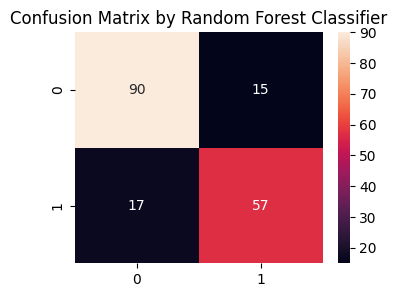

In [89]:
plt.figure(figsize =(4,3))
sns.heatmap(cf,annot =True)
plt.title("Confusion Matrix by Random Forest Classifier")
plt.show()

In [93]:
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
#Use GridSearchCV to tune hyperparameters for RandomForestClassifier. Try tuning n_estimators and max_depth.

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
df = {"n_estimators":[50,100,200,250],
      "max_depth":[5,10,30,40]
     }

In [99]:
gd = GridSearchCV(RandomForestClassifier(),param_grid=df)
gd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, 40],
                         'n_estimators': [50, 100, 200, 250]})

In [100]:
gd.score(x_train,y_train)*100  , gd.score(x_test,y_test)*100

(85.81460674157303, 79.88826815642457)

# Votingclassifier

In [101]:
#Build an ensemble model using VotingClassifier (Logistic Regression + Random Forest + SVC)

In [105]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [116]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [118]:
sv = SVC(kernel = "linear")
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [119]:
li = [("lr",LogisticRegression(max_iter = 1000)),("rf",RandomForestClassifier(n_estimators = 6)),("sv",SVC(kernel ="linear"))]

In [120]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(n_estimators=6)),
                             ('sv', SVC(kernel='linear'))])

In [121]:
prd = {"lr":lr.predict(x_test),"rf":rf.predict(x_test),"sv":sv.predict(x_test),"vc":vc.predict(x_test)}

In [123]:
prd = pd.DataFrame(prd)

In [125]:
prd.head(5)

,lr,rf,sv,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,1,0,1,1
